In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/co2_emission.csv")
df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [ ]:
df.rename(columns = {"Entity": "Country", "Annual CO₂ emissions (tonnes )": "CO₂_emissions(tonnes)"}, inplace = True)
df

,Country,Code,Year,CO₂_emissions(tonnes)
0,Afghanistan,AFG,1949,14656.00
1,Afghanistan,AFG,1950,84272.00
2,Afghanistan,AFG,1951,91600.00
3,Afghanistan,AFG,1952,91600.00
4,Afghanistan,AFG,1953,106256.00
...,...,...,...,...
20848,Zimbabwe,ZWE,2013,11536239.29
20849,Zimbabwe,ZWE,2014,11866348.41
20850,Zimbabwe,ZWE,2015,10907603.94
20851,Zimbabwe,ZWE,2016,9932649.88


In [ ]:
df.isnull().sum()

Country                     0
Code                     2207
Year                        0
CO₂_emissions(tonnes)       0
dtype: int64

In [ ]:
df.drop("Code", axis = 1, inplace = True)
df.head()

,Country,Year,CO₂_emissions(tonnes)
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0


In [ ]:
df.columns

Index(['Country', 'Year', 'CO₂_emissions(tonnes)'], dtype='object')

In [ ]:
df.dtypes

Country                   object
Year                       int64
CO₂_emissions(tonnes)    float64
dtype: object

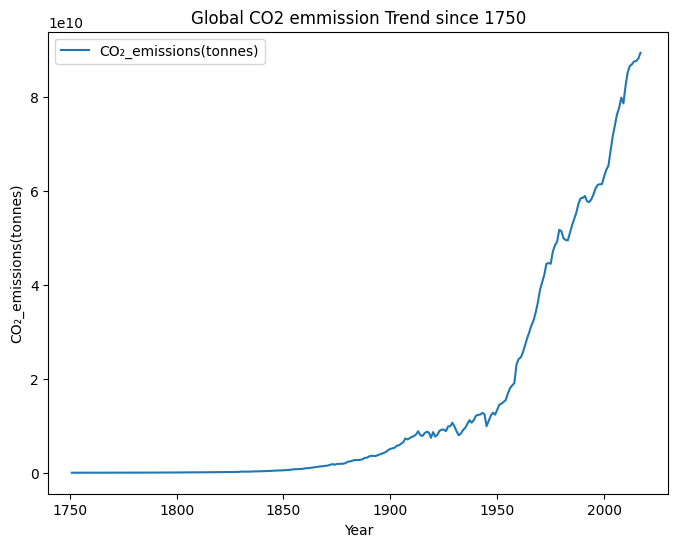

In [ ]:
df_year = df.groupby(["Year"])[["CO₂_emissions(tonnes)"]].sum()
xmin = 1740
xmax = 2030
df_year.plot(kind = "line", figsize = (8,6), xlim = (xmin, xmax))
plt.title("Global CO2 emmission Trend since 1750")
plt.xlabel("Year")
plt.ylabel("CO₂_emissions(tonnes)")
plt.show()

In [ ]:
df_country = df.groupby(["Country"])[["CO₂_emissions(tonnes)"]].sum()
dftop10 = df_country.sort_values(by ="CO₂_emissions(tonnes)", ascending = True ).drop(["World"]).tail(10)
dftop10

,CO₂_emissions(tonnes)
Country,
Japan,6.230461e+10
United Kingdom,7.707106e+10
Germany,9.056563e+10
Americas (other),9.864116e+10
Russia,1.005891e+11
Europe (other),1.575402e+11
Asia and Pacific (other),1.780573e+11
China,2.001365e+11
EU-28,3.528583e+11


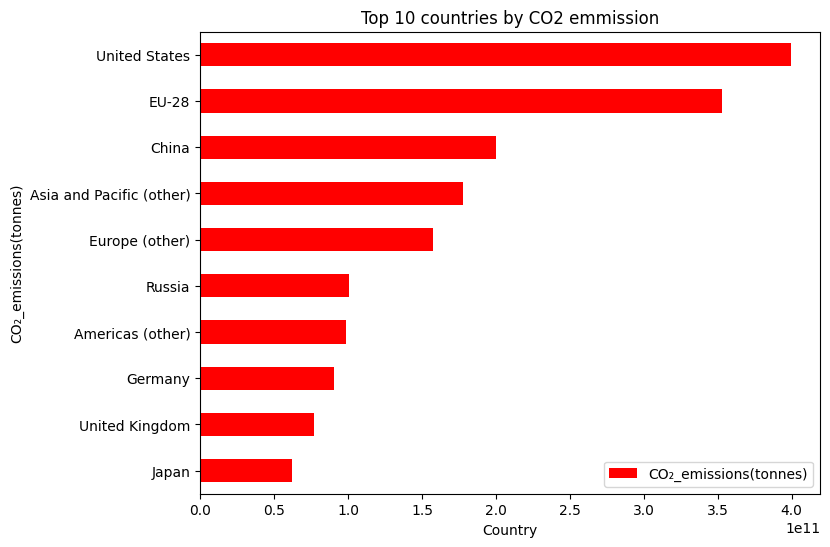

In [ ]:
dftop10.plot(kind ="barh", figsize = (8, 6), color = "red")
plt.title("Top 10 countries by CO2 emmission")
plt.xlabel("Country")
plt.ylabel("CO₂_emissions(tonnes)")
plt.show()

In [ ]:
years = list(map(str, range(1920, 2018)))
print (years)
df_us  = df[df["Country"] == "United States"][["Year", "CO₂_emissions(tonnes)"]]
df_us.set_index('Year', inplace=True)
df_EU  = df[df["Country"] == "EU-28"][["Year", "CO₂_emissions(tonnes)"]]
df_China  = df[df["Country"] == "China"][["Year", "CO₂_emissions(tonnes)"]]
df_Asia  = df[df["Country"] == "Asia and Pacific (other)"][["Year", "CO₂_emissions(tonnes)"]]
df_Europe = df[df["Country"] == "Europe (other)"][["Year", "CO₂_emissions(tonnes)"]]

df_us[["Year"]]

SyntaxError: ignored

In [ ]:
Country = ["United States", "EU-28", "China", "Asia and Pacific (other)", "Europe (other)"]
for x in Country:
  i=1
  df_i = df[df["Country"] == x][["Year", "CO₂_emissions(tonnes)"]]
  print (x, df_i.tail())
  i+=1

United States        Year  CO₂_emissions(tonnes)
19923  2013           5.519613e+09
19924  2014           5.568759e+09
19925  2015           5.420804e+09
19926  2016           5.310861e+09
19927  2017           5.269530e+09
EU-28       Year  CO₂_emissions(tonnes)
6086  2013           3.659241e+09
6087  2014           3.490383e+09
6088  2015           3.523492e+09
6089  2016           3.503031e+09
6090  2017           3.543683e+09
China       Year  CO₂_emissions(tonnes)
4480  2013           9.796527e+09
4481  2014           9.820360e+09
4482  2015           9.716468e+09
4483  2016           9.704479e+09
4484  2017           9.838754e+09
Asia and Pacific (other)       Year  CO₂_emissions(tonnes)
1513  2013           4.799613e+09
1514  2014           4.802001e+09
1515  2015           4.874047e+09
1516  2016           4.961165e+09
1517  2017           5.071156e+09
Europe (other)       Year  CO₂_emissions(tonnes)
6871  2013           2.205195e+09
6872  2014           2.154823e+09
6873  2015

4231    0.000000e+00
4232    0.000000e+00
4233    0.000000e+00
4234    0.000000e+00
4235    0.000000e+00
            ...     
4480    9.796527e+09
4481    9.820360e+09
4482    9.716468e+09
4483    9.704479e+09
4484    9.838754e+09
Name: CO₂_emissions(tonnes), Length: 254, dtype: float64 5824    9.350528e+06
5825    9.354192e+06
5826    9.354192e+06
5827    9.357856e+06
5828    9.361520e+06
            ...     
6086    3.659241e+09
6087    3.490383e+09
6088    3.523492e+09
6089    3.503031e+09
6090    3.543683e+09
Name: CO₂_emissions(tonnes), Length: 267, dtype: float64 19661    0.000000e+00
19662    0.000000e+00
19663    0.000000e+00
19664    0.000000e+00
19665    0.000000e+00
             ...     
19923    5.519613e+09
19924    5.568759e+09
19925    5.420804e+09
19926    5.310861e+09
19927    5.269530e+09
Name: CO₂_emissions(tonnes), Length: 267, dtype: float64


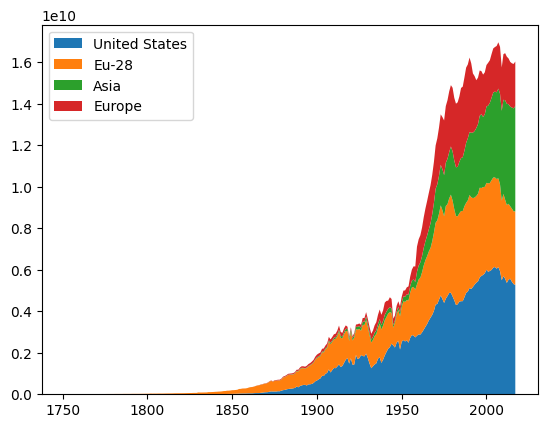

In [ ]:
import numpy as np
x = df_us["Year"]
x1 = np.arange(1920,2021)
y1 = df_us["CO₂_emissions(tonnes)"]
y2 = df_EU["CO₂_emissions(tonnes)"]
y3 = df_China["CO₂_emissions(tonnes)"]
print(y3,y2,y1)
y4 = df_Asia["CO₂_emissions(tonnes)"]
y5 =df_Europe["CO₂_emissions(tonnes)"]
plt.stackplot(x,y1,y2,y4,y5, labels = ("United States", "Eu-28", "Asia", "Europe"))
plt.legend(loc = "upper left")

plt.show()


In [ ]:
x1 = np.arange(1920,2021)